<a href="https://colab.research.google.com/github/bob8dod/ML-studying/blob/main/ML_DL/22_DL_in_Python(XOR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

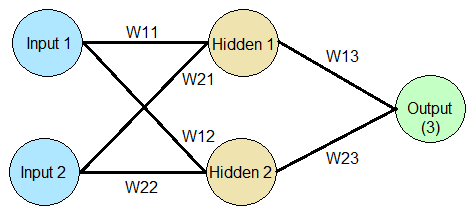

Reference: https://codingvision.net/c-backpropagation-tutorial-xor

In [ ]:
import numpy as np
import random
random.seed(777)

In [ ]:
#Set Data, Options
data =[
       [[0,0],[0]],
       [[0,1],[1]],
       [[1,0],[1]],
       [[1,1],[0]]
]
iterations = 5000 #iterations_ epochs
lr = 0.1 #Learning rate
mo = 0.4 #momentom coefficeint

In [ ]:
#Set Activation function, Weight matrix
def sigmoid(x, derivative = False):
  if derivative == True : #Derivative mode
    return x*(1-x)
  return 1/(1+np.exp(-x)) #Original mode

def tanh(x, derivative = False):
  if derivative == True: #Derivative mode
    return 1-x**2
  return np.tanh(x) #Original mode

def makeMatrix(i,j,fill=0.0):
  mat = []
  for i in range(i):
    mat.append([fill]*j)
  return mat

In [ ]:
#Nueral Network part
class NeuralNetwork:

    def __init__(self, num_x, num_yh, num_yo, bias=1):

        #input, hidden layer, output layer
        self.num_x = num_x + bias #set bias to 1
        self.num_yh = num_yh
        self.num_yo = num_yo

        # set activation value : hypo <= (logit->activaion)
        self.activation_input = [1.0] * self.num_x #just input
        self.activation_hidden = [1.0] * self.num_yh
        self.activation_out = [1.0] * self.num_yo

        # set weight(hidden layer)
        self.weight_in = makeMatrix(self.num_x, self.num_yh)
        for i in range(self.num_x):
            for j in range(self.num_yh):
                self.weight_in[i][j] = random.random()

        # set weight(output layer)
        self.weight_out = makeMatrix(self.num_yh, self.num_yo)
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                self.weight_out[j][k] = random.random()

        # for previous weight, Momentom SGD 
        self.gradient_in = makeMatrix(self.num_x, self.num_yh)
        self.gradient_out = makeMatrix(self.num_yh, self.num_yo)

    #Update _ forwards!
    def update(self, inputs):

        # Input data
        for i in range(self.num_x - 1):
            self.activation_input[i] = inputs[i]

        # Hidden layer's hypothesis(result of hidden activation function)
        for j in range(self.num_yh):
            logit = 0.0
            for i in range(self.num_x):
                logit = logit + self.activation_input[i] * self.weight_in[i][j] # logit = x1*w11 + x2*w21 
            self.activation_hidden[j] = tanh(logit, False) #Hypothesis of hidden layer, Using tanh()

        # Output layer's hypothesis(result of Output activation function)
        for k in range(self.num_yo):
            logit = 0.0
            for j in range(self.num_yh):
                logit = logit + self.activation_hidden[j] * self.weight_out[j][k] # logit = y_h1*w11 + y_h2*w21 
            self.activation_out[k] = tanh(logit, False) #final Prediction _ Hypothesis of output layer, Using tanh()

        return self.activation_out[:]
    
    #Optimization _ backwards!
    def backPropagate(self, targets):

        #set deltas
        output_deltas = [0.0] * self.num_yo
        for k in range(self.num_yo):
            error = targets[k] - self.activation_out[k] # = (label - pred)
            output_deltas[k] = tanh(self.activation_out[k], True) * error #Apply Differiential _ (y_t1 - y_o1)*tanh'

        hidden_deltas = [0.0] * self.num_yh
        for j in range(self.num_yh):
            error = 0.0
            for k in range(self.num_yo):
                error = error + output_deltas[k] * self.weight_out[j][k] # = Del_y_o1* w11 + Del_y_o2*w21
            hidden_deltas[j] = tanh(self.activation_hidden[j], True) * error #Apply Differiential_ (Del_y_o1* w11 + Del_y_o2*w21)*tanh'

        #Update Weight of output
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                gradient = output_deltas[k] * self.activation_hidden[j]
                v = mo * self.gradient_out[j][k] - lr * gradient
                self.weight_out[j][k] += v
                self.gradient_out[j][k] = gradient

        #Update Weight of hidden
        for i in range(self.num_x):
            for j in range(self.num_yh):
                gradient = hidden_deltas[j] * self.activation_input[i]
                v = mo*self.gradient_in[i][j] - lr * gradient
                self.weight_in[i][j] += v
                self.gradient_in[i][j] = gradient

        #Mean Squared Error
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5 * (targets[k] - self.activation_out[k]) ** 2
        return error

    #Opperating Train
    def train(self, patterns):
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0] # x_data
                targets = p[1] # y_data
                self.update(inputs) #apply update _ forwards!
                error = error + self.backPropagate(targets) #apply backPropagate _ backwards! -> Optimization
            if i % 500 == 0:
                print('error: %-.5f' % error)
    #Print Output
    def result(self, patterns):
        for p in patterns:
            print('Input: %s, Predict: %s' % (p[0], self.update(p[0])))

if __name__ == '__main__': 
    n = NeuralNetwork(2, 2, 1) # 2 inputs, 2 layers, 1 output
    n.train(data) # training
    n.result(data) # print the result

# Reference: http://arctrix.com/nas/python/bpnn.py (Neil Schemenauer)

error: 0.46941
error: 0.00221
error: 0.00082
error: 0.00049
error: 0.00035
error: 0.00027
error: 0.00022
error: 0.00018
error: 0.00016
error: 0.00014
Input: [0, 0], Predict: [0.0005723707008293684]
Input: [0, 1], Predict: [0.98902866191907]
Input: [1, 0], Predict: [0.9890510941525785]
Input: [1, 1], Predict: [0.0021706412161304426]
